In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

Import csv file into Pandas and view contents -->

In [1261]:
seq_df = pd.read_csv('tech_test/sequence_table.csv')

In [1262]:
seq_df.head()

,Unnamed: 0,read_count_in_input_library,read_count_in_output_library
0,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...,1.0,0.0
1,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,0.0
2,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,13.0,0.0
3,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0
4,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,17.0


In [1263]:
seq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13046 entries, 0 to 13045
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    13046 non-null  object 
 1   read_count_in_input_library   13046 non-null  float64
 2   read_count_in_output_library  13046 non-null  float64
dtypes: float64(2), object(1)
memory usage: 305.9+ KB


In [1264]:
seq_df.describe()

,read_count_in_input_library,read_count_in_output_library
count,13046.000000,13046.00000
mean,11.534033,15.80975
std,5.423982,29.43316
min,0.000000,0.00000
25%,9.000000,0.00000
50%,12.000000,0.00000
75%,15.000000,27.00000
max,36.000000,546.00000


Rename column with sequences

In [1265]:
seq_df.rename(columns={"Unnamed: 0": "sequence"}, inplace=True)

In [1266]:
seq_df.sort_values(by=["read_count_in_input_library"])


,sequence,read_count_in_input_library,read_count_in_output_library
1136,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0
534,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0
11134,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0
11118,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0
11106,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,27.0
...,...,...,...
970,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,30.0,0.0
6362,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,30.0,0.0
4284,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,31.0,0.0
11840,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,31.0,51.0


Plot distributions of read counts 

Text(0.5, 0, 'Read count')

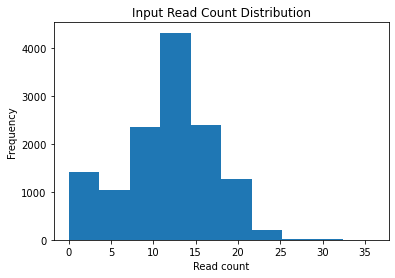

In [1267]:
ax1 = seq_df.read_count_in_input_library.plot.hist(title="Input Read Count Distribution")
ax1.set_xlabel("Read count")

Text(0.5, 0, 'Read count')

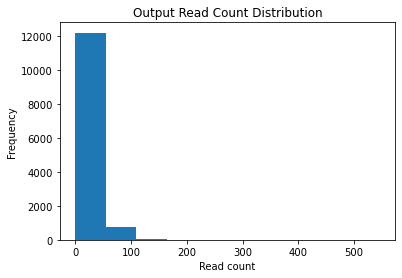

In [1268]:
ax2 = seq_df.read_count_in_output_library.plot.hist(title="Output Read Count Distribution")
ax2.set_xlabel("Read count")

Check uniqueness of sequences

In [1269]:
unique_seq= seq_df["sequence"].unique()
unique_seq_df = pd.DataFrame(data=unique_seq, columns=["sequence"])
print(unique_seq_df)

                                                sequence
0      AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...
1      AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
2      AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
3      AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
4      AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
...                                                  ...
13041  GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13042  TAGGTGCAGCTGGTGGACTCTGGGGGAGGCCTGGTCAAGCCTGGAG...
13043  TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13044  TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13045  TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...

[13046 rows x 1 columns]


Check length of designed library

In [1270]:
variant_library = "CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCNNSNNSNNSNNSTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTNNSNNSNNSNNSACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA"

In [1271]:
variant_library_series = pd.Series(variant_library)
variant_library_series.str.len()

0    296
dtype: int64

In [1272]:
seq_df["Match"]= np.nan

In [1273]:
variant_library_2_series = re.sub("N", ".", "CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCNNSNNSNNSNNSTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTNNSNNSNNSNNSACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA")
variant_library_2_series = re.sub("S", "[GC]", "CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTC..S..S..S..STACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGT..S..S..S..SACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA")

In [1274]:
variant_library_2_series 

'CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTC..[GC]..[GC]..[GC]..[GC]TACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGT..[GC]..[GC]..[GC]..[GC]ACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA'

In [1275]:
seq_df["Design"]= variant_library_2_series
seq_df

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design
0,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...,1.0,0.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
1,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,0.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
2,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,13.0,0.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
3,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
4,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,17.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
...,...,...,...,...,...
13041,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,20.0,0.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13042,TAGGTGCAGCTGGTGGACTCTGGGGGAGGCCTGGTCAAGCCTGGAG...,0.0,1.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13043,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13044,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,NaN,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...


In [1276]:
seq_df["Match"]= seq_df['sequence'].str.match("CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTC..[GC]..[GC]..[GC]..[GC]TACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGT..[GC]..[GC]..[GC]..[GC]ACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA")

Check whether sequences contain only G, A, C or T

In [1277]:
variant_library_3 = re.sub(".", "[GCAT]", "CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCNNSNNSNNSNNSTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTNNSNNSNNSNNSACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA")
variant_library_3


'[GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GC

In [1278]:
nucleotide_match= seq_df['sequence'].str.match('[GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT][GCAT]')
nucleotide_match

0        True
1        True
2        True
3        True
4        True
         ... 
13041    True
13042    True
13043    True
13044    True
13045    True
Name: sequence, Length: 13046, dtype: bool

How many sequences match design?

In [1279]:
seq_df["Match"].value_counts()

True     11562
False     1484
Name: Match, dtype: int64

In [1280]:
seq_df["Match"].value_counts(normalize=True)

True     0.886249
False    0.113751
Name: Match, dtype: float64

In [1281]:
seq_df

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design
0,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...,1.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
1,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
2,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,13.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
3,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
4,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,17.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
...,...,...,...,...,...
13041,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,20.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13042,TAGGTGCAGCTGGTGGACTCTGGGGGAGGCCTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13043,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13044,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...


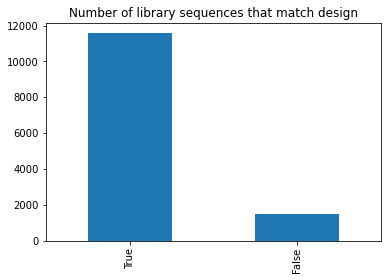

In [1282]:
seq_df["Match"].value_counts().plot(kind='bar', title= "Number of library sequences that match design")
    

Split non-matching sequences to evaluate at each position

In [1283]:
 non_match_df = seq_df.loc[seq_df["Match"] == False, "sequence"]

In [1284]:
non_match_df

0        AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...
1        AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
2        AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
3        AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
4        AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
                               ...                        
13041    GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13042    TAGGTGCAGCTGGTGGACTCTGGGGGAGGCCTGGTCAAGCCTGGAG...
13043    TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13044    TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
13045    TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...
Name: sequence, Length: 1484, dtype: object

In [1285]:
non_match_df = non_match_df.apply(lambda x: pd.Series(list(x))) 

In [1286]:
non_match_df

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,A,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
1,A,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
2,A,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
3,A,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
4,A,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,G,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
13042,T,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
13043,T,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN
13044,T,A,G,G,T,G,C,A,G,C,...,C,G,A,G,A,G,A,NaN,NaN,NaN


Check lengths of non-matching sequences

In [1287]:
nt = non_match_df.count(axis=0) 
nt

0      1484
1      1484
2      1484
3      1484
4      1484
       ... 
294    1484
295    1484
296     112
297      63
298      31
Length: 299, dtype: int64

In [1288]:
# Unfinished: aim to assess numbers of each nucleotide at each position and plot stacked bar chart
# nt_counts = pd.Series([])
# i = 0
# for i in non_match_df[i]:
#     nt_counts= nt_counts + non_match_df[i].value_counts()
#     if i > 295:
#         break
#     else:
#         i=i+1
# nt_counts
# non_match_df.append(nt_count)
# non_match_df_len = len(non_match_df)
# non_match_df.loc[non_match_df_len]= nt_count

In [1289]:
total_input_reads = seq_df["read_count_in_input_library"].sum()
total_input_reads

total_output_reads = seq_df["read_count_in_output_library"].sum()
total_output_reads

seq_df["Percentage of input pool"]= seq_df["read_count_in_input_library"]/total_input_reads * 100
seq_df

seq_df["Percentage of output pool"]= seq_df["read_count_in_output_library"]/total_output_reads * 100
seq_df


,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design,Percentage of input pool,Percentage of output pool
0,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGACAAGCCTGGAG...,1.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.000000
1,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.000000
2,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,13.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.008639,0.000000
3,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000000,0.000485
4,AAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,17.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000000,0.008242
...,...,...,...,...,...,...,...
13041,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,20.0,0.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.013291,0.000000
13042,TAGGTGCAGCTGGTGGACTCTGGGGGAGGCCTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000000,0.000485
13043,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000000,0.000485
13044,TAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.0,1.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000000,0.000485


Clean data, remove sequences with 0 reads

In [1290]:
seq_df_clean = seq_df[seq_df.read_count_in_output_library != 0]
seq_df_clean = seq_df_clean[seq_df_clean.read_count_in_input_library != 0]
# seq_df_clean = seq_df_clean[seq_df_clean.Match == True]
seq_df_clean

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design,Percentage of input pool,Percentage of output pool
42,CAGGTGAAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,394.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.191027
59,CAGGTGCAGCGACTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTG...,12.0,51.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.024727
110,CAGGTGCAGCTGGTGGAGNCTGGGGGAGGCTTGGTCAAGCCTGGAG...,9.0,16.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.005981,0.007757
173,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCATTGGTCAAGCCTGGA...,8.0,32.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.005317,0.015515
192,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTNGGTCAAGCCTGGAG...,12.0,40.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.019394
...,...,...,...,...,...,...,...
12895,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTNGTCAAGCCTGGAG...,22.0,468.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.014621,0.226905
12919,CAGGTGCAGCTGGTGGAGTCTGGGGNAGGCTTGGTCAAGCCTGGAG...,11.0,25.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007310,0.012121
12936,CAGGTGCAGCTGGTGGAGTCTGTGGGGAGGCTTGGTCAAGCCTGGA...,12.0,29.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.014060
12962,CAGGTGCAGCTGGTGGNGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,18.0,54.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.011962,0.026181


Create affinity metric and sort by

In [1291]:
seq_df_clean["Affinity"] = seq_df_clean["read_count_in_output_library"] / seq_df_clean["read_count_in_input_library"]

In [1292]:
seq_df_clean

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design,Percentage of input pool,Percentage of output pool,Affinity
42,CAGGTGAAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,394.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.191027,394.000000
59,CAGGTGCAGCGACTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTG...,12.0,51.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.024727,4.250000
110,CAGGTGCAGCTGGTGGAGNCTGGGGGAGGCTTGGTCAAGCCTGGAG...,9.0,16.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.005981,0.007757,1.777778
173,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCATTGGTCAAGCCTGGA...,8.0,32.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.005317,0.015515,4.000000
192,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTNGGTCAAGCCTGGAG...,12.0,40.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.019394,3.333333
...,...,...,...,...,...,...,...,...
12895,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTNGTCAAGCCTGGAG...,22.0,468.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.014621,0.226905,21.272727
12919,CAGGTGCAGCTGGTGGAGTCTGGGGNAGGCTTGGTCAAGCCTGGAG...,11.0,25.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007310,0.012121,2.272727
12936,CAGGTGCAGCTGGTGGAGTCTGTGGGGAGGCTTGGTCAAGCCTGGA...,12.0,29.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.014060,2.416667
12962,CAGGTGCAGCTGGTGGNGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,18.0,54.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.011962,0.026181,3.000000


In [1293]:
seq_df_clean= seq_df_clean.sort_values(by=["Affinity"])
seq_df_clean

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design,Percentage of input pool,Percentage of output pool,Affinity
3650,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,18.0,1.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.011962,0.000485,0.055556
1790,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,18.0,2.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.011962,0.000970,0.111111
1715,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,9.0,1.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.005981,0.000485,0.111111
3043,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,17.0,2.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.011298,0.000970,0.117647
1373,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,15.0,2.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.009969,0.000970,0.133333
...,...,...,...,...,...,...,...,...
4645,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,11.0,471.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007310,0.228359,42.818182
1135,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,10.0,482.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.006646,0.233692,48.200000
6713,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,52.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.025212,52.000000
1803,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,6.0,469.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.003987,0.227390,78.166667


In [1294]:
High_affinity_df=seq_df_clean.nlargest(50,"Affinity").sort_values(by=["Affinity"])

In [1295]:
High_affinity_df.sort_values(by=["Affinity"], ascending=False)

,sequence,read_count_in_input_library,read_count_in_output_library,Match,Design,Percentage of input pool,Percentage of output pool,Affinity
42,CAGGTGAAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,394.0,False,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.191027,394.000000
1803,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,6.0,469.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.003987,0.227390,78.166667
6713,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,52.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.025212,52.000000
1135,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,10.0,482.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.006646,0.233692,48.200000
4645,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,11.0,471.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007310,0.228359,42.818182
8000,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,15.0,546.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.009969,0.264722,36.400000
10543,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,12.0,426.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.206541,35.500000
5265,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,1.0,34.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.000665,0.016485,34.000000
6089,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,16.0,534.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.010633,0.258904,33.375000
9948,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,12.0,393.0,True,CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAG...,0.007975,0.190542,32.750000


Distribution after cleaning

Text(0.5, 0, 'Read count')

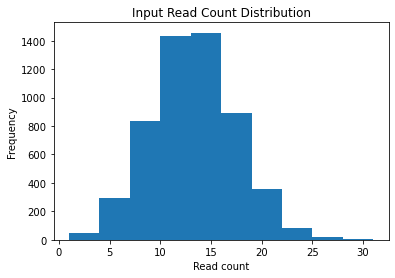

In [1296]:
ax1 = seq_df_clean.read_count_in_input_library.plot.hist(title="Input Read Count Distribution")
ax1.set_xlabel("Read count")

Text(0.5, 0, 'Read count')

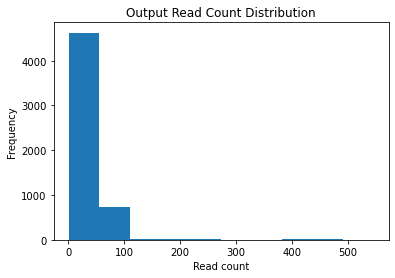

In [1297]:
ax2 = seq_df_clean.read_count_in_output_library.plot.hist(title="Output Read Count Distribution")
ax2.set_xlabel("Read count")

In [1298]:
seq_df_clean.describe()


,read_count_in_input_library,read_count_in_output_library,Percentage of input pool,Percentage of output pool,Affinity
count,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000
mean,12.779745,37.008301,0.008493,0.017943,3.364440
std,4.156865,35.892266,0.002763,0.017402,6.290456
min,1.000000,1.000000,0.000665,0.000485,0.055556
25%,10.000000,21.000000,0.006646,0.010182,1.600000
50%,13.000000,30.000000,0.008639,0.014545,2.450000
75%,15.000000,43.000000,0.009969,0.020848,3.900000
max,31.000000,546.000000,0.020602,0.264722,394.000000


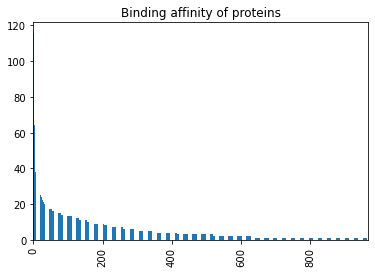

In [1299]:
seq_df_clean["Affinity"].value_counts().plot(kind='bar',xticks= ([0, 200, 400, 600,800]), title= "Binding affinity of proteins")

In [1300]:
seq_df_clean.quantile(0.99)

read_count_in_input_library      23.000000
read_count_in_output_library    139.800000
Match                             1.000000
Percentage of input pool          0.015285
Percentage of output pool         0.067781
Affinity                         16.492308
Name: 0.99, dtype: float64

In [1301]:
protein1= High_affinity_df.iloc[0,0]
protein2= High_affinity_df.iloc[1,0]
protein3= High_affinity_df.iloc[2,0]

In [1302]:
protein1

'CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCTCCCCCGCCTGCTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTGTCTTGGTCTCCACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA'

In [1303]:
protein2

'CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCCGCGCGGCCTACTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTGGCTAGGAGTTCACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA'

In [1305]:
protein3

'CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCAAGCCTGGAGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCGTCGACTGCTTCTACTACATGAGCTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTTCATACATTAGTGTCGGCTCCTGCACCATATACTACGCAGACTCTGTGAAGGGCCGATTCACCATCTCCAGGGACAACGCCAAGAACTCACTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTGTATTACTGTGCGAGAGA'